In [6]:
#imports libs and data
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pickle, json

from scipy.ndimage.filters import gaussian_filter1d as smooth


from functions import (simpleplot, ne_Bolz, Te_eff_calcl, phi_drop,
                        sigma_maxw_unsat,
                        sigma_maxw_sat,
                        newSigma_maxw, maxwE
                      ,)

import matplotlib as mpl
import matplotlib.pyplot as plt

qe = 1.6021766E-19
me =  9.109E-31 
mi = 219.6E-27
eps0 = 8.854187817e-12

data_all = pickle.load( open( "save_data_all.p", "rb" ) )
PIC = pickle.load( open( "PICvalues.dat", "rb" ) )
savepath = "../figure/"

sigma_0 = 0.5
sigma_max= 2.9

In [7]:
Paper_style = json.load(open("Paperstyle.json",'r'))
mpl.style.use(Paper_style)

In [10]:
#plot functions
def subs(Nsub = 1):
    
    fig, axarr = plt.subplots(1,Nsub,figsize = (Nsub*4,3))

    if Nsub == 1:
        axarr = [axarr]
        
    return fig, axarr

def axLabels(ax,title,xlabel,ylabel):
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()

(0, 400)

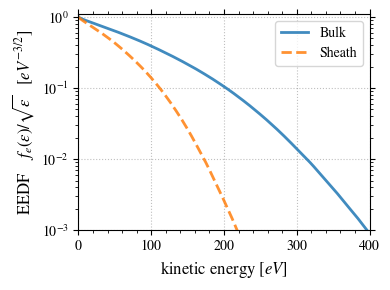

In [11]:
alpha = 0.85

fig, axarr  = subs(1)
ax = axarr[0]

data = np.loadtxt("hist_bulk.dat")
v, f = data[0,:], data[1,:]
v, f = v[v>0], f[v>0]
etab = v**2*me/(2*qe)
normedf = f/f.max()
ax.plot(etab, normedf, label = "Bulk", alpha = alpha, linestyle = "-")

data = np.loadtxt("hist_sheath.dat")
v, f = data[0,:], data[1,:]
v, f = v[v>0], f[v>0]
etab = v**2*me/(2*qe)
ax.plot(etab, normedf, label = "Sheath", alpha = alpha, linestyle = "--")

# Te = 50
# e = np.linspace(0.1,400,400)
# toplot = np.sqrt(np.abs(e))**-1*maxwE(np.abs(e),Te)
# #toplot *= 5e-14
# toplot /= toplot.max()

axLabels(ax,"","kinetic energy $[eV]$", "EEDF $\quad f_e(\epsilon) / \sqrt{\epsilon}  \quad [eV^{-3/2}]$")
ax.set_yscale("log")
ax.set_ylim(1e-3, 1.1)
ax.set_xlim(0, 400)

In [12]:
def return_absE(f,vtab):
        import math
        mask1 = vtab > 0
        Nbin1 = sum(mask1)
        Nbin2 = len(vtab) - Nbin1
        Nbin = max(Nbin1, Nbin2)
        e = np.zeros(Nbin)

        e[:Nbin1] += abs(f[mask1])
        e[:Nbin2] += abs(f[np.logical_not(mask1)][::-1])
        
        return (e/2)

-14.10780497993297
-0.007394074885379354
-1.4466520829791243


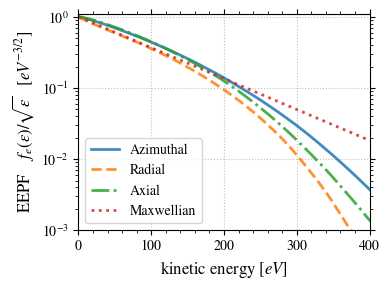

In [15]:
fig, axarr  = subs(1)
ax = axarr[0]

data = np.loadtxt("all_dist.data")
ls = ["Azimuthal", "Radial", "Axial"]
style = ["-", "--", "-."]
for i,l,s in zip([0,1,2], ls, style):
    vcoords, f1 = data[2*i,:], data[2*i+1,:]
    print((vcoords*f1).sum())
    #vcoords, f1 = vcoords[vcoords>0], f1[vcoords>0]
    vcoords, f1 = vcoords, f1
    etab = vcoords**2*me/(2*qe)
    normedf = f1 /f1.max()

    e = return_absE(f1,vcoords)
    e /= e.max()
    
    #plt.plot(etab, normedf, label = "Sheath"+str(i), alpha = alpha, linestyle = "--")
    plt.plot(etab[vcoords>0], e, label = l, alpha = alpha, linestyle = s)
    
Te = 50
e = np.linspace(0.1,400,400)
toplot = np.sqrt(np.abs(e))**-1*maxwE(np.abs(e),Te)
toplot /= toplot.max()

ax.plot(e,toplot,":", label = "Maxwellian",
               alpha = alpha )

ax.set_yscale("log")
ax.set_ylim(1e-3, 1.1)
ax.set_xlim(0, 400)
axLabels(ax,"","kinetic energy $[eV]$", "EEPF $\quad f_e(\epsilon) / \sqrt{\epsilon}  \quad [eV^{-3/2}]$")


-14.10780497993297
-0.007394074885379354
-1.4466520829791243


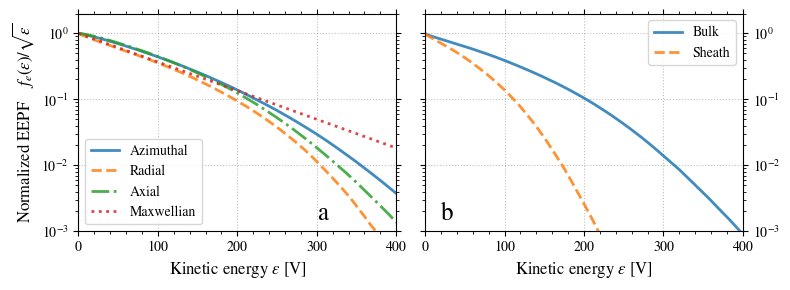

In [27]:
fig, axarr  = plt.subplots(1,2,figsize=(8,3))
ax = axarr[0]
alpha = 0.85

data = np.loadtxt("all_dist.data")
ls = ["Azimuthal", "Radial", "Axial"]
style = ["-", "--", "-."]
for i,l,s in zip([0,1,2], ls, style):
    vcoords, f1 = data[2*i,:], data[2*i+1,:]
    print((vcoords*f1).sum())
    #vcoords, f1 = vcoords[vcoords>0], f1[vcoords>0]
    vcoords, f1 = vcoords, f1
    etab = vcoords**2*me/(2*qe)
    normedf = f1 /f1.max()

    e = return_absE(f1,vcoords)
    e /= e.max()
    
    #plt.plot(etab, normedf, label = "Sheath"+str(i), alpha = alpha, linestyle = "--")
    ax.plot(etab[vcoords>0], e, label = l, alpha = alpha, linestyle = s)
    
Te = 50
e = np.linspace(0.1,400,400)
toplot = np.sqrt(np.abs(e))**-1*maxwE(np.abs(e),Te)
toplot /= toplot.max()

ax.plot(e,toplot,":", label = "Maxwellian",
               alpha = alpha )

ax.set_xlim(0,400)
ax.set_yscale("log")
ax.set_ylim(1e-3, 2)
axLabels(ax,"","Kinetic energy $\epsilon$ [V]", "Normalized EEPF $\quad f_e(\epsilon) / \sqrt{\epsilon}$")

ax = axarr[1]
data = np.loadtxt("hist_bulk.dat")
v, f = data[0,:], data[1,:]
v, f = v[v>0], f[v>0]
etab = v**2*me/(2*qe)
normedf = f/f.max()

ax.plot(etab, normedf, label = "Bulk", alpha = alpha, linestyle = "-")

data = np.loadtxt("hist_sheath.dat")
v, f = data[0,:], data[1,:]
v, f = v[v>0], f[v>0]
etab = v**2*me/(2*qe)

ax.plot(etab, normedf, label = "Sheath", alpha = alpha, linestyle = "--")
ax.set_xlim(0,400)
ax.set_yscale("log")
ax.set_ylim(1e-3, 2)

axLabels(ax,"","Kinetic energy $\epsilon$ [V]", "")

ax.tick_params( reset = True,
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    #left=False,      # ticks along the bottom edge are off
    labelright=True,
    labelleft=False) # labels along the bottom edge are off

axarr[0].text(300,1.5e-3,"a", fontsize = 18)
axarr[1].text(20,1.5e-3,"b", fontsize = 18)
plt.savefig(savepath+"EEDF_2.pdf")
